<a href="https://colab.research.google.com/github/Rebecca-202211/titanic_analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_Titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import pandas as pd
import numpy as np

In [220]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

In [221]:
data = df.copy()

In [222]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Column Information**

**survival**:	Survival
0 = No, 1 = Yes

**pclass**:	Ticket class
1 = 1st, 2 = 2nd, 3 = 3rd

**sex**:	Sex

**Age**:	Age in years

**sibsp**:	# of siblings / spouses aboard the Titanic

**parch**:	# of parents / children aboard the Titanic

**ticket**:	Ticket number

**fare**:	Passenger fare

**cabin**:	Cabin number

**embarked**:	Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

In [223]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [224]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [225]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Checking missing values in Age**
1. fill in na with the mean after grouping by Pclass and Sex
2. fill in na with the mean after grouping by siblings and parents
3. fill in na with the mean after grouping by Pclass only(least std)

In [226]:
data[data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


**Age**

In [227]:
mean_age = data.groupby(['Sex','Fare'])['Age'].transform('mean')

In [228]:
data['Age'].fillna(mean_age,inplace = True)

In [229]:
data.Age.isna().sum()

55

In [230]:
mean_age_sp = data.groupby(['SibSp','Parch'])['Age'].transform('mean')

In [231]:
data.Age.fillna(mean_age_sp,inplace= True)

In [232]:
data.Age.isna().sum()

7

In [233]:
data[data.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [234]:
miss_age_pmedian = data.groupby('Pclass')['Age'].transform('median')

In [235]:
data.Age.fillna(miss_age_pmedian,inplace = True)

In [236]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [237]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Checking missing values in Embarked**

drop the data with missing value in embarked

In [238]:
data.dropna(subset=['Embarked'], inplace = True)

In [239]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Check the relationship between features and the target(Survived)**

<ipython-input-240-79bd9588b458>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


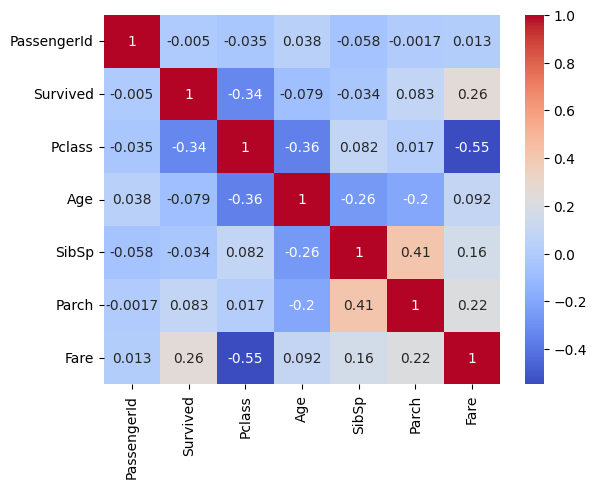

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

In [241]:
data.corr()['Survived']

<ipython-input-241-fdffd623bf21>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Survived']


PassengerId   -0.005028
Survived       1.000000
Pclass        -0.335549
Age           -0.078683
SibSp         -0.034040
Parch          0.083151
Fare           0.255290
Name: Survived, dtype: float64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

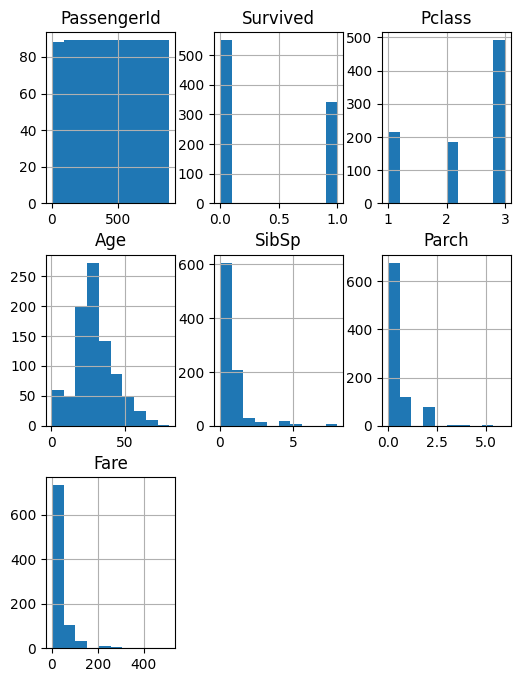

In [242]:
data.hist(figsize = (6,8))

**Data Processing**

In [243]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [244]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# **Transform columns with get_dummies**

**Sex**

In [245]:
new_sex = pd.get_dummies(data['Sex'])
new_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


**Embarked**

In [246]:
new_embarked = pd.get_dummies(data['Embarked'], prefix = 'Embarked')
new_embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


**Pclass**

In [247]:
new_pclass = pd.get_dummies(data['Pclass'], prefix = 'Pclass')

**Name(Title)**

In [248]:
title = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [249]:
title_dict = {
    'Capt' : 'Officer',
    'Col' : 'Officer',
    'Major': 'Officer',
    'Jonkheer' : 'Royalty',
    'Don': 'Royalty',
    'Mme': 'Mrs',
    'Mlle': 'Miss',
    'Master': 'Master',
    'Lady': 'Royalty'

}
title = title.map(title_dict)
new_title = pd.get_dummies(title)

**Cabin**

In [250]:
data['Cabin'] = data.Cabin.fillna('U')
new_cabin = pd.get_dummies(data.Cabin.apply(lambda x: x[0]), prefix = 'Cabin')

**Ticket**

In [251]:
data['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [252]:
ticket1 = data.Ticket.apply(lambda s: s.replace('.','').replace('/','').split())
def ticket(x):
  if len(x) == 1:
    return 'others'
  else:
    return x[0]

ticket1 = ticket1.apply(lambda x: ticket(x))
new_ticket = pd.get_dummies(ticket1, prefix = 'Ticket')


In [253]:
new_ticket

,Ticket_A4,Ticket_A5,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_PC,...,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_others
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Parch, Sibsp**

In [254]:
family_size = pd.DataFrame()
family_size['Total'] = data['Parch']+data['SibSp']+1
family_size

,Total
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


In [255]:
family_size['Family_Single'] = family_size['Total'].apply(lambda x: 1 if x==1 else 0)
family_size['Family_Small'] = family_size['Total'].apply(lambda x: 1 if 2<=x<=4 else 0)
family_size['Family_Large'] = family_size['Total'].apply(lambda x: 1 if 5<=x else 0)

In [256]:
family_size.drop('Total',axis = 1, inplace = True)

In [257]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [258]:
new_data = pd.concat([new_pclass, new_title, new_sex, data[['Age','Fare']],
                      family_size,new_ticket, new_embarked, data['Survived']], axis = 1)

In [259]:
new_data.dtypes

Pclass_1            uint8
Pclass_2            uint8
Pclass_3            uint8
Master              uint8
Miss                uint8
Mrs                 uint8
Officer             uint8
Royalty             uint8
female              uint8
male                uint8
Age               float64
Fare              float64
Family_Single       int64
Family_Small        int64
Family_Large        int64
Ticket_A4           uint8
Ticket_A5           uint8
Ticket_AS           uint8
Ticket_C            uint8
Ticket_CA           uint8
Ticket_CASOTON      uint8
Ticket_FC           uint8
Ticket_FCC          uint8
Ticket_Fa           uint8
Ticket_PC           uint8
Ticket_PP           uint8
Ticket_PPP          uint8
Ticket_SC           uint8
Ticket_SCA4         uint8
Ticket_SCAH         uint8
Ticket_SCOW         uint8
Ticket_SCPARIS      uint8
Ticket_SCParis      uint8
Ticket_SOC          uint8
Ticket_SOP          uint8
Ticket_SOPP         uint8
Ticket_SOTONO2      uint8
Ticket_SOTONOQ      uint8
Ticket_SP   

**Logistic Regression**

In [260]:
train_X = new_data.drop('Survived', axis = 1)
train_y = new_data['Survived']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=42, max_iter=3000)
scores = cross_val_score(log, train_X, train_y, cv=5,scoring='accuracy')
print(scores.mean())

0.8268139402018664


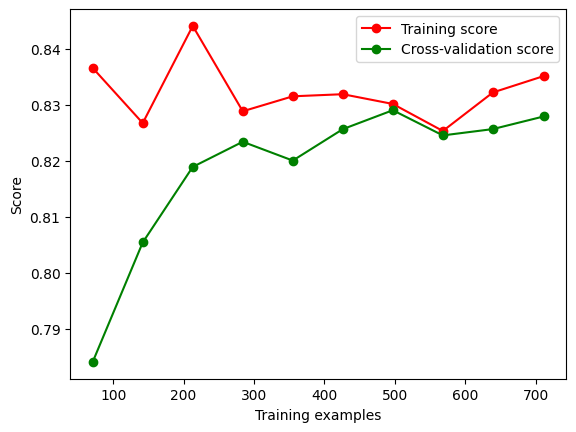

TypeError: ignored

In [270]:
from sklearn.model_selection import learning_curve, validation_curve

# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(estimator=log, X=train_X, y=train_y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# 繪製學習曲線
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 計算驗證曲線
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(estimator=log, X=train_X, y=train_y, param_range=param_range, cv=5)

# 繪製驗證曲線
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

**Decision Tree**

In [262]:
train_X = new_data.drop('Survived', axis = 1)
train_y = new_data['Survived']

tree = DecisionTreeClassifier(random_state=60)
scores = cross_val_score(log, train_X, train_y, cv=8,scoring='accuracy')
print(scores.mean())

0.8267676158301158


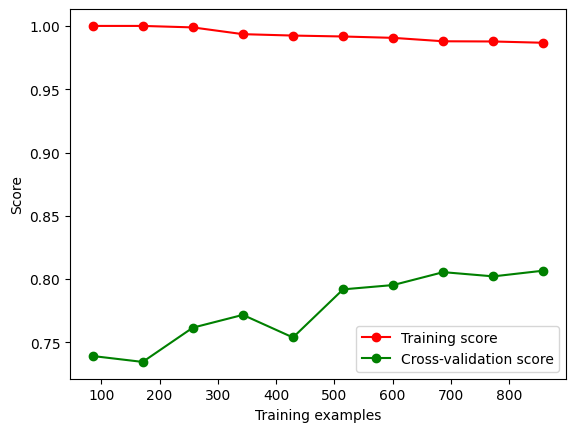

TypeError: ignored

In [277]:
# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(estimator=tree, X=train_X, y=train_y, train_sizes=np.linspace(0.1, 1.0, 10), cv=30)

# 繪製學習曲線
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 計算驗證曲線
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(estimator=tree, X=train_X, y=train_y, param_range=param_range, cv=30)

# 繪製驗證曲線
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

**KNeighborsClassifier**

In [263]:
train_X = new_data.drop('Survived', axis = 1)
train_y = new_data['Survived']

knc = KNeighborsClassifier(n_neighbors=70)
scores = cross_val_score(knc, train_X, train_y, cv=8,scoring='accuracy')
print(scores.mean())

0.6750120656370657


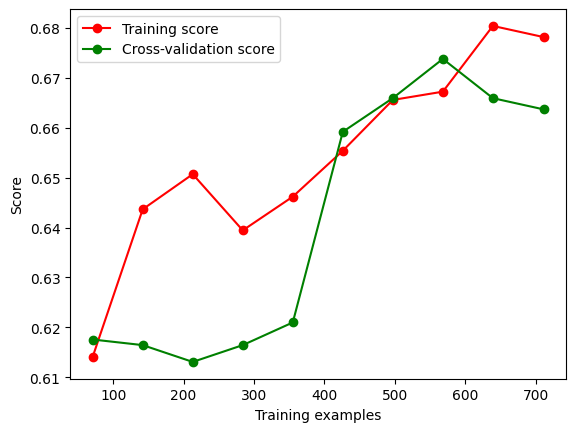

TypeError: ignored

In [272]:
# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(estimator=knc, X=train_X, y=train_y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# 繪製學習曲線
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 計算驗證曲線
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(estimator=knc, X=train_X, y=train_y, param_range=param_range, cv=5)

# 繪製驗證曲線
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

**GaussianNB**

In [264]:
train_X = new_data.drop('Survived', axis = 1)
train_y = new_data['Survived']

gnb = GaussianNB()
scores = cross_val_score(gnb, train_X, train_y, cv=5,scoring='accuracy')
print(scores.mean())

0.4341776169618485


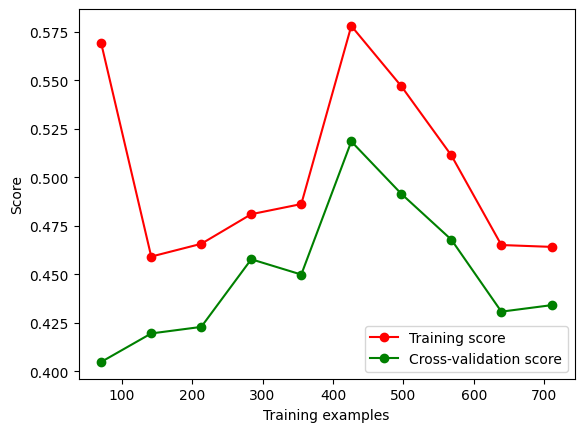

TypeError: ignored

In [273]:
# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(estimator=gnb, X=train_X, y=train_y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# 繪製學習曲線
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 計算驗證曲線
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(estimator=gnb, X=train_X, y=train_y, param_range=param_range, cv=5)

# 繪製驗證曲線
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

**SVC**

In [265]:
train_X = new_data.drop('Survived', axis = 1)
train_y = new_data['Survived']

svc = SVC()
scores = cross_val_score(svc, train_X, train_y, cv=5,scoring='accuracy')
print(scores.mean())

0.6681901859963182


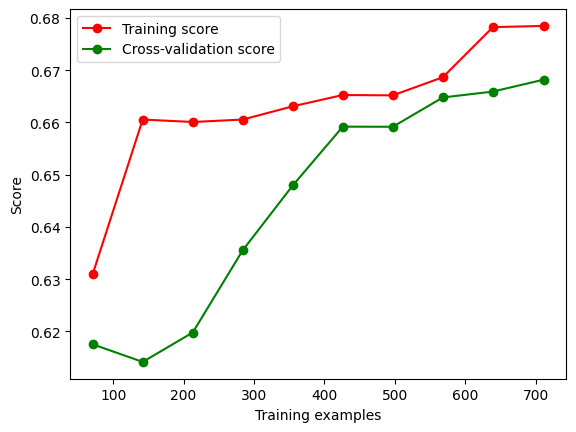

TypeError: ignored

In [274]:
# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(estimator=svc, X=train_X, y=train_y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# 繪製學習曲線
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 計算驗證曲線
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(estimator=svc, X=train_X, y=train_y, param_range=param_range, cv=5)

# 繪製驗證曲線
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

**LinearSVC**

In [266]:
train_X = new_data.drop('Survived', axis = 1)
train_y = new_data['Survived']

lsvc = LinearSVC()
scores = cross_val_score(lsvc, train_X, train_y, cv=15,scoring='accuracy')
print(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

0.7805649717514125


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

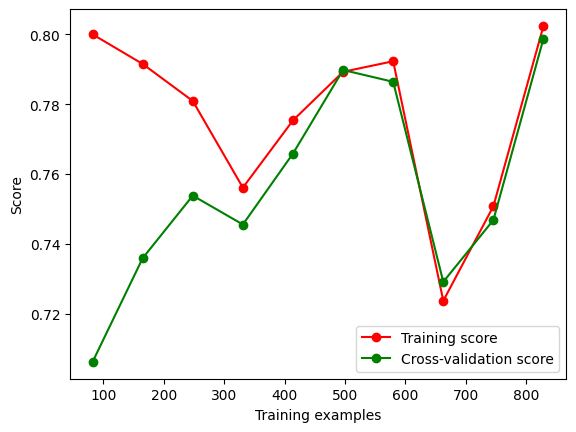

TypeError: ignored

In [278]:
# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(estimator=lsvc, X=train_X, y=train_y, train_sizes=np.linspace(0.1, 1.0, 10), cv=15)

# 繪製學習曲線
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 計算驗證曲線
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(estimator=lsvc, X=train_X, y=train_y, param_range=param_range, cv=15)

# 繪製驗證曲線
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

**RandomForestClassifier**

In [267]:
train_X = new_data.drop('Survived', axis = 1)
train_y = new_data['Survived']

rfc = RandomForestClassifier(n_estimators=99)
scores = cross_val_score(rfc, train_X, train_y, cv=8,scoring='accuracy')
print(scores.mean())

0.8166324806949807


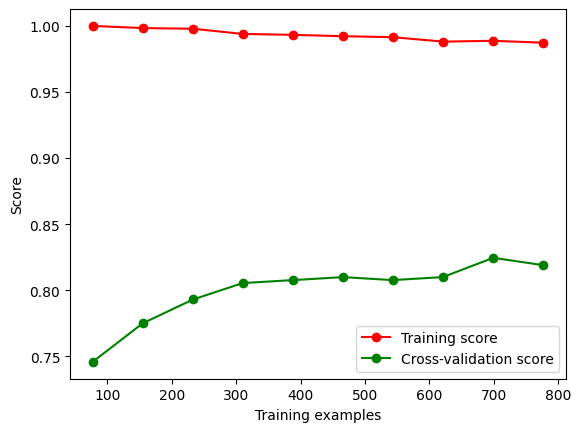

TypeError: ignored

In [279]:
# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(estimator=rfc, X=train_X, y=train_y, train_sizes=np.linspace(0.1, 1.0, 10), cv=8)

# 繪製學習曲線
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 計算驗證曲線
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(estimator=rfc, X=train_X, y=train_y, param_range=param_range, cv=8)

# 繪製驗證曲線
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

**GradientBoostingClassifier**

In [268]:
train_X = new_data.drop('Survived', axis = 1)
train_y = new_data['Survived']

gbc = GradientBoostingClassifier(n_estimators=65)
scores = cross_val_score(rfc, train_X, train_y, cv=30,scoring='accuracy')
print(scores.mean())

0.8288888888888889


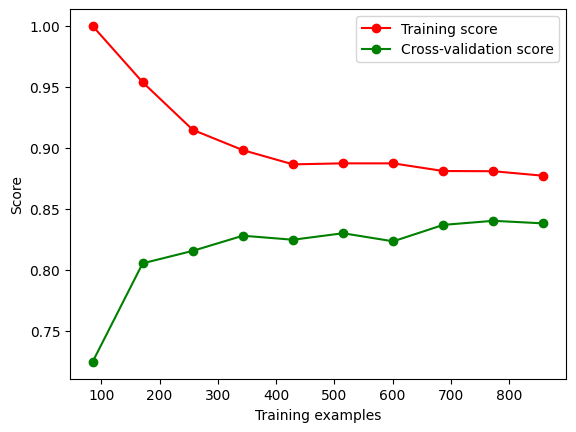

TypeError: ignored

In [281]:
# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(estimator=gbc, X=train_X, y=train_y, train_sizes=np.linspace(0.1, 1.0, 10), cv=30)

# 繪製學習曲線
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# 計算驗證曲線
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(estimator=gbc, X=train_X, y=train_y, param_range=param_range, cv=15)
30
# 繪製驗證曲線
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()